In [117]:
# Dependencies
import numpy as np
import datetime as dt
import pandas as pd
import matplotlib.pyplot as plt

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [92]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [93]:
# Create our session (link) from Python to the DB
session = Session(engine)

## D1: Determine the Summary Statistics for June

In [94]:
# 1. Import the sqlalchemy extract function.
from sqlalchemy import extract

# 2. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 
results_june = session.query(Measurement.tobs).filter(extract('month', Measurement.date) == 6).all()

In [95]:
#  3. Convert the June temperatures to a list.
june_temp = np.ravel(results_june)

In [96]:
# 4. Create a DataFrame from the list of temperatures for the month of June. 
june_temp_df = pd.DataFrame(june_temp, columns=['June Temps'])
june_temp_df

,June Temps
0,78.0
1,76.0
2,78.0
3,76.0
4,77.0
...,...
1695,79.0
1696,74.0
1697,74.0
1698,76.0


In [97]:
# 5. Calculate and print out the summary statistics for the June temperature DataFrame.
stats_june = june_temp_df.describe()
stats_june

,June Temps
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


## D2: Determine the Summary Statistics for December

In [98]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
results_dec = session.query(Measurement.tobs).filter(extract('month', Measurement.date)==12).all()

In [99]:
# 7. Convert the December temperatures to a list.
dec_temp = np.ravel(results_dec)

In [100]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
dec_temp_df = pd.DataFrame(dec_temp, columns=['December Temps'])

In [101]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
stats_dec = dec_temp_df.describe()
stats_dec

,December Temps
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


In [102]:
stats_combined =stats_june.copy()
stats_combined['December Temps'] = stats_dec['December Temps']
stats_combined

,June Temps,December Temps
count,1700.000000,1517.000000
mean,74.944118,71.041529
std,3.257417,3.745920
min,64.000000,56.000000
25%,73.000000,69.000000
50%,75.000000,71.000000
75%,77.000000,74.000000
max,85.000000,83.000000


In [103]:
stats_combined['Difference'] = stats_combined['June Temps'] - stats_combined['December Temps']
stats_combined

,June Temps,December Temps,Difference
count,1700.000000,1517.000000,183.000000
mean,74.944118,71.041529,3.902588
std,3.257417,3.745920,-0.488503
min,64.000000,56.000000,8.000000
25%,73.000000,69.000000,4.000000
50%,75.000000,71.000000,4.000000
75%,77.000000,74.000000,3.000000
max,85.000000,83.000000,2.000000


<AxesSubplot:>

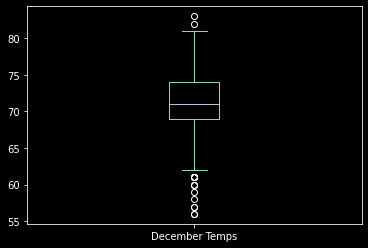

In [105]:
dec_temp_df.plot.box()

<AxesSubplot:>

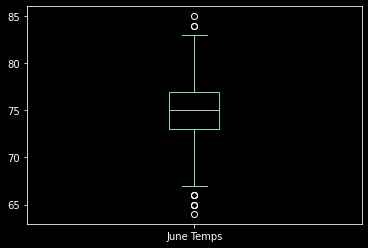

In [106]:
june_temp_df.plot.box()

In [120]:
prec_dec = session.query(Measurement.prcp).filter(extract('month', Measurement.date)==12).all()
prec_dec_df = pd.DataFrame(prec_dec, columns=['December Precipitation'])
prec_june = session.query(Measurement.prcp).filter(extract('month', Measurement.date)==6).all()
prec_june_df = pd.DataFrame(prec_june, columns=['June Precipitation'])

In [123]:
summary_prec = prec_june_df.describe()
summary_prec['December Precipitation'] = prec_dec_df['December Precipitation'].describe()
summary_prec

,June Precipitation,December Precipitation
count,1574.000000,1405.000000
mean,0.136360,0.216819
std,0.335731,0.541399
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.020000,0.030000
75%,0.120000,0.150000
max,4.430000,6.420000


In [130]:
no_rain_june = pd.DataFrame(session.query(Measurement.tobs).filter(Measurement.prcp == 0).filter(extract('month', Measurement.date)==6).all(), columns=['No Rain June'])
no_rain_dec = pd.DataFrame(session.query(Measurement.tobs).filter(Measurement.prcp == 0).filter(extract('month', Measurement.date)==12).all(), columns=['No Rain December'])

In [131]:
no_rain_summary = no_rain_june.describe()
no_rain_summary['No Rain December'] = no_rain_dec['No Rain December'].describe()
no_rain_summary

,No Rain June,No Rain December
count,647.000000,510.000000
mean,76.299845,70.541176
std,2.999440,4.337581
min,65.000000,57.000000
25%,75.000000,68.000000
50%,77.000000,71.000000
75%,78.000000,74.000000
max,85.000000,81.000000
